In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.feature_selection import VarianceThreshold

In [15]:
data_folder_path = Path('../../data/')
data_all = pd.read_csv(data_folder_path / 'data_train_continuous_data.csv')
# Identify target and predictor variables
target_variables_list = ['decade', 'main_genre', 'spotify_popularity']
predictor_variables_list = [
    'drone_ratio',
    'average_overlap',
    'average_2overlap',
    'average_3overlap',
    'average_4overlap',
    'average_5overlap',
    'maj_triad_ratio',
    'min_triad_ratio',
    'unique_5gram_density',
    'unique_chord_density'
]

In [16]:
def select_features_by_variance(predictors, threshold=0.01):
    """Select features above variance threshold."""
    variances = predictors.var()
    print("Variance of each predictor:")
    print(variances.sort_values())

    selector = VarianceThreshold(threshold=threshold)
    selected_features = selector.fit_transform(predictors)

    selected_names = predictors.columns[selector.get_support()].tolist()
    removed_names = predictors.columns[~selector.get_support()].tolist()

    print(f"\nSelected: {len(selected_names)}, Removed: {len(removed_names)}")
    print(f"Selected features: {selected_names}")
    print(f"Removed features: {removed_names}")

    return pd.DataFrame(selected_features, columns=selected_names), variances

def plot_variance_distribution(variances, threshold=0.01):
    """Plot variance distribution with threshold line."""
    plt.figure(figsize=(10, 6))
    variances.sort_values().plot(kind='barh')
    plt.xlabel('Variance')
    plt.title('Variance of Predictor Variables')
    plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold={threshold}')
    plt.legend()
    plt.tight_layout()
    plt.show()

Variance of each predictor:
unique_chord_density    0.006747
drone_ratio             0.016064
min_triad_ratio         0.036335
unique_5gram_density    0.037281
maj_triad_ratio         0.060153
average_overlap         0.155537
average_5overlap        0.237249
average_3overlap        0.334148
average_2overlap        0.352050
average_4overlap        0.426339
dtype: float64

Selected: 9, Removed: 1
Selected features: ['drone_ratio', 'average_overlap', 'average_2overlap', 'average_3overlap', 'average_4overlap', 'average_5overlap', 'maj_triad_ratio', 'min_triad_ratio', 'unique_5gram_density']
Removed features: ['unique_chord_density']


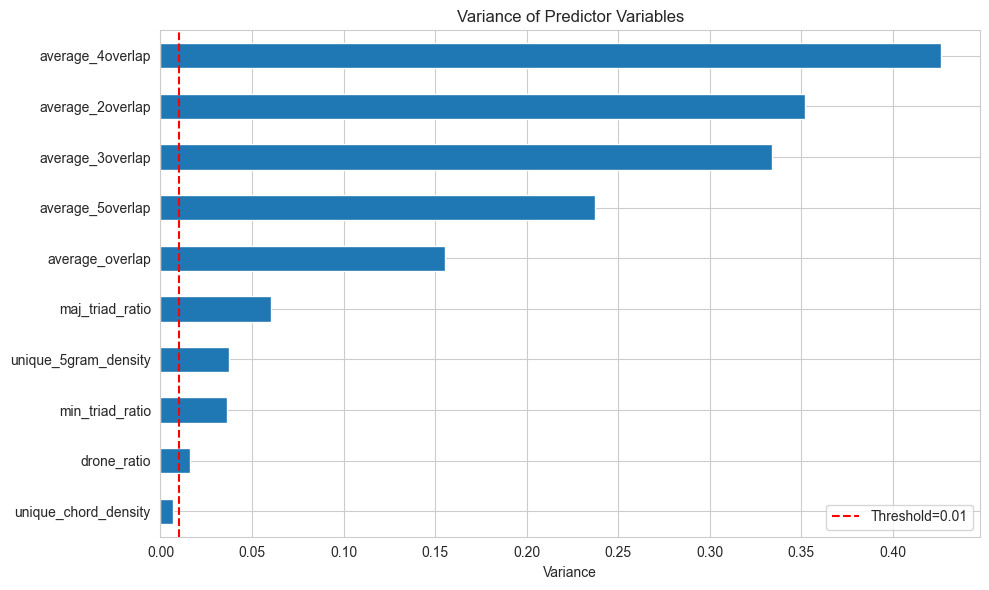

In [17]:
# Remove very low variance features
threshold=0.01
predictors_filtered, variances = select_features_by_variance(predictors, threshold=threshold)
plot_variance_distribution(variances, threshold=threshold)

Variance of each predictor:
unique_chord_density    0.006747
drone_ratio             0.016064
min_triad_ratio         0.036335
unique_5gram_density    0.037281
maj_triad_ratio         0.060153
average_overlap         0.155537
average_5overlap        0.237249
average_3overlap        0.334148
average_2overlap        0.352050
average_4overlap        0.426339
dtype: float64

Selected: 6, Removed: 4
Selected features: ['average_overlap', 'average_2overlap', 'average_3overlap', 'average_4overlap', 'average_5overlap', 'maj_triad_ratio']
Removed features: ['drone_ratio', 'min_triad_ratio', 'unique_5gram_density', 'unique_chord_density']


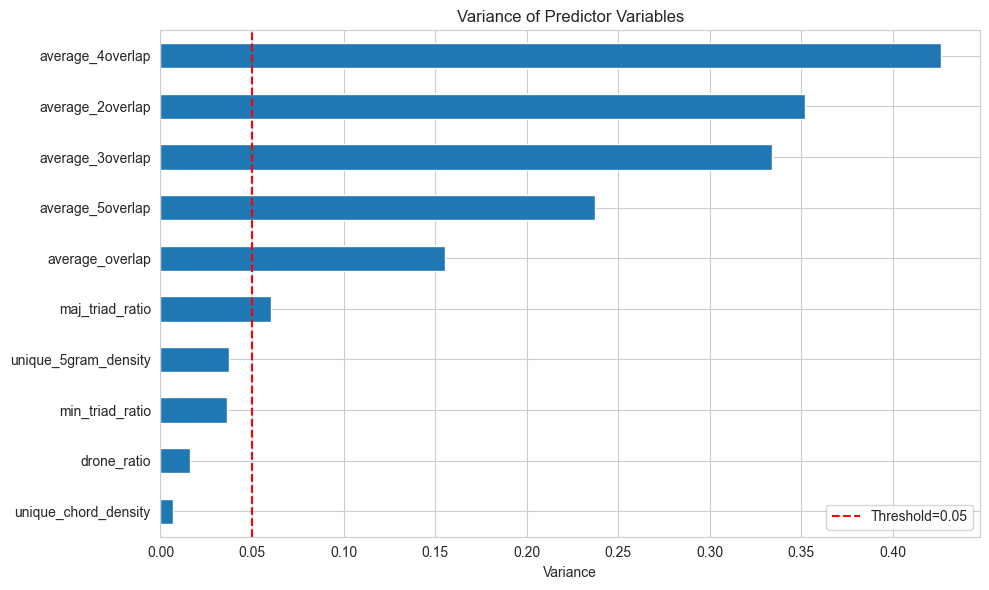

In [18]:
# Remove low variance features
threshold=0.05
predictors_filtered, variances = select_features_by_variance(predictors, threshold=threshold)
plot_variance_distribution(variances, threshold=threshold)

Variance of each predictor:
unique_chord_density    0.006747
drone_ratio             0.016064
min_triad_ratio         0.036335
unique_5gram_density    0.037281
maj_triad_ratio         0.060153
average_overlap         0.155537
average_5overlap        0.237249
average_3overlap        0.334148
average_2overlap        0.352050
average_4overlap        0.426339
dtype: float64

Selected: 5, Removed: 5
Selected features: ['average_overlap', 'average_2overlap', 'average_3overlap', 'average_4overlap', 'average_5overlap']
Removed features: ['drone_ratio', 'maj_triad_ratio', 'min_triad_ratio', 'unique_5gram_density', 'unique_chord_density']


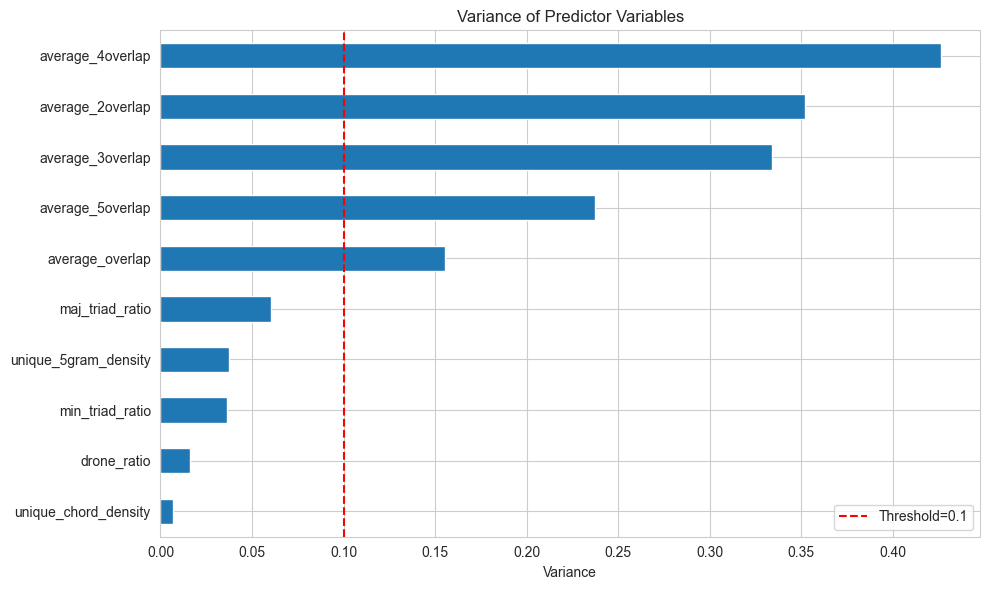

In [19]:
# Remove variance features with more aggressive filter
threshold=0.1
predictors_filtered, variances = select_features_by_variance(predictors, threshold=threshold)
plot_variance_distribution(variances, threshold=threshold)